In [1]:
import sklearn as sk
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [2]:
happiness_data = pd.read_excel(r"C:\Users\Michael G\Desktop\2019.xlsx")
happiness_data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [3]:
happiness_data.set_index('Overall rank')

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,,,,,,,,
1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...
152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025


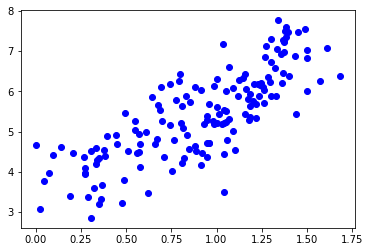

In [4]:
y = happiness_data['Score']
x = happiness_data['GDP per capita']
plt.plot(x,y, 'o', color = 'blue')

In [5]:
y.corr(x)

0.7938828678781276

In [6]:
Y = happiness_data[['Score']]
X = happiness_data[['GDP per capita']]
model = LinearRegression().fit(X,Y)

In [7]:
print(model.intercept_)
print(model.coef_)

[3.39934518]
[[2.218148]]


GDP per capita    0.0
dtype: float64
Score    7.769
dtype: float64


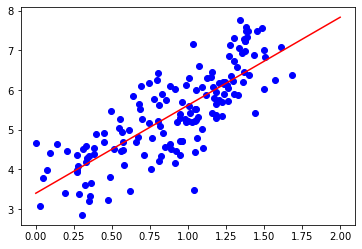

In [8]:
b1 = model.intercept_
b0 = model.coef_
y = happiness_data['Score']
x = happiness_data['GDP per capita']

xx = np.linspace(np.min(X),2)
print(np.min(X))
print(np.max(Y))
yy = b1 + b0 * xx
plt.plot(X,Y, 'o', color = 'blue')
plt.plot(xx, yy, color = 'red')

In [15]:
X = sm.add_constant(x)
model1 = sm.OLS(y,X).fit()
print(model1.summary())
predicted_values = model1.predict()  # predicted values
residual_values = model1.resid
print(model1.params)


                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     262.5
Date:                Fri, 22 Jan 2021   Prob (F-statistic):           4.32e-35
Time:                        08:28:34   Log-Likelihood:                -159.97
No. Observations:                 156   AIC:                             323.9
Df Residuals:                     154   BIC:                             330.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.3993      0.135     25.